In [153]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [154]:
df = pd.read_csv("../data/MorningTest4.csv")[['price']]
print(len(df))

sc = MinMaxScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df))
# df_scaled = df

5700


Calculate slopes

In [155]:
ewa = df.ewm(span=20, adjust=False).mean() #20
slope = ewa.diff()
npslope = np.array(slope)
bought = False
sumwin = 0
transactions = []
for i, pt in enumerate(npslope):
    if pt > 0.047 and not bought: #0.005
        bought = df.iat[i,0]
        # print("bought", i, pt)
    if pt < -0.01 and bought: #-0.001
        # print("Selling",i, pt)
        transactions.append(df.iat[i,0] - bought)
        sumwin = sumwin + df.iat[i,0] - bought
        # print(df.iat[i,0] - bought)
        bought = False
print("Total winning", sumwin)

Total winning 29.667088999999805


In [156]:
npslope

array([[        nan],
       [-0.00655895],
       [-0.00688667],
       ...,
       [ 0.03232971],
       [ 0.03210783],
       [ 0.04904994]])

Transactions:  80
Average:  0.37083861249999756
Median:  -0.31317699999999604


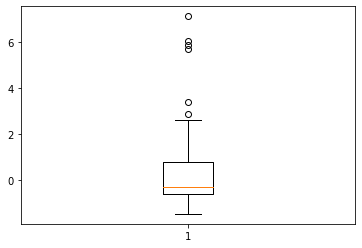

In [157]:
import statistics
import matplotlib.pyplot as plt

print("Transactions: ", len(transactions))
print("Average: ", statistics.mean(transactions))
print("Median: ", statistics.median(transactions))
plt.boxplot(transactions)
plt.show()
# transactions.sort()
# print(transactions)

## Optimizer

In [160]:
def calc_slope(sb, ss, df1):
    ewa = df1.ewm(span=20, adjust=False).mean() #20
    slope = ewa.diff()
    npslope = np.array(slope)
    bought = False
    sumwin = 0
    transactions = []
    i = 0
    while i < len(npslope):
        pt = npslope[i]
        if pt > sb and not bought: #0.005
            bought = df.iat[i,0]
            i = i + 6
            # print("bought", i, pt)
        if pt < ss and bought: #-0.001
            # print("Selling",i, pt)
            transactions.append(df.iat[i,0] - bought)
            sumwin = sumwin + df.iat[i,0] - bought
            # print(df.iat[i,0] - bought)
            bought = False
        i = i + 1
    return (round(sumwin, 3), round(sb, 3), round(ss, 3), len(transactions))

In [161]:
df = pd.read_csv("../data/MorningTest.csv")[['price']]
results = []
for buy_slope in np.arange(0, 0.1, 0.001):
    for sell_slope in np.arange(-0.02, 0.005, 0.0025):
        results.append(calc_slope(buy_slope, sell_slope, df))

sorted(results, key = lambda x: -x[0])

019, -0.015, 936),
 (450.101, 0.022, -0.015, 915),
 (449.995, 0.045, -0.01, 745),
 (449.859, 0.015, -0.013, 996),
 (449.663, 0.043, -0.008, 772),
 (449.642, 0.021, -0.015, 924),
 (449.622, 0.017, -0.015, 957),
 (449.613, 0.02, -0.018, 917),
 (449.56, 0.048, -0.005, 746),
 (449.442, 0.018, -0.013, 965),
 (449.44, 0.05, -0.003, 747),
 (449.248, 0.053, -0.0, 733),
 (449.188, 0.003, -0.018, 1072),
 (449.142, 0.009, -0.018, 1013),
 (449.052, 0.013, -0.013, 1014),
 (449.037, 0.007, -0.018, 1031),
 (449.008, 0.044, -0.008, 763),
 (448.955, 0.028, -0.015, 866),
 (448.522, 0.011, -0.018, 996),
 (448.453, 0.016, -0.018, 950),
 (448.287, 0.023, -0.015, 907),
 (448.218, 0.022, -0.018, 902),
 (448.184, 0.035, -0.013, 818),
 (448.11, 0.014, -0.013, 1004),
 (448.052, 0.012, -0.018, 988),
 (447.841, 0.015, -0.015, 977),
 (447.777, 0.024, -0.018, 886),
 (447.517, 0.051, -0.003, 741),
 (447.488, 0.01, -0.018, 1007),
 (447.474, 0.006, -0.02, 1015),
 (447.379, 0.008, -0.018, 1024),
 (447.379, 0.018, -0.01

In [170]:
from datetime import datetime
time = datetime.now().strftime("%H:%M:%S")
print(f"{datetime.now().strftime('%H:%M:%S')}")

15:24:38
